In [47]:
pip install matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [48]:
pip install statsmodels

^C
Note: you may need to restart the kernel to use updated packages.


In [44]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [45]:
pip install rich

^C
Note: you may need to restart the kernel to use updated packages.


In [14]:
from rich.console import Console
from rich.markdown import Markdown
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# Importo libreria para trabajar con dates 
from datetime import timedelta
# Libreria para estimar regresión
import statsmodels.formula.api as sm
# Libreria para normalizar
from sklearn.preprocessing import StandardScaler

# OBJETIVO GENERAL
Desarrollar un modelo predictivo que permita estimar el precio de laptops basándose en sus especificaciones técnicas, mediante el análisis de datos y la implementación de algoritmos de machine learning, con el fin de facilitar la toma de decisiones informadas en la compra de laptops y comprender mejor la relación entre las características de los productos y su valor en el mercado.
<br><br/>
## Contexto Comercial
En la actualidad, el mercado de la tecnología se caracteriza por una amplia variedad de productos, lo que incluye laptops de diferentes marcas, modelos y especificaciones. Con el aumento constante de la demanda por dispositivos electrónicos, los consumidores enfrentan la dificultad de tomar decisiones informadas al seleccionar una laptop que se ajuste a sus necesidades y presupuesto. Además, los precios de las laptops pueden variar significativamente en función de sus características técnicas, lo que genera incertidumbre en los compradores.
<br><br/>
## Problema Comercial
Los consumidores a menudo carecen de información clara y accesible sobre cómo las especificaciones técnicas afectan los precios de las laptops. Esta falta de conocimiento puede resultar en decisiones de compra poco óptimas y en la insatisfacción del cliente. Asimismo, los vendedores y fabricantes buscan herramientas que les permitan establecer precios competitivos y alineados con las expectativas del mercado.
<br><br/>
## Contexto Analítico
Para desarrollar el modelo, se cuenta con la siguiente información del dataset de laptops:

- **Marca y Modelo**: Información del fabricante y el modelo específico de la laptop.
- **Especificaciones Técnicas**: Detalles como tamaño de pantalla, memoria RAM, almacenamiento SSD/HDD, y tipo de procesador.
- **Precio en Euros**: Precio de venta actual de las laptops.
- **Tipo de Laptop**: Clasificación de laptops (Notebook, Ultrabook, etc.).
<br><br/>
## Objetivos Específicos
- Mejorar la Toma de Decisiones: Ayudar a los consumidores a entender mejor la relación entre las características de las laptops y su precio, facilitando así decisiones de compra más informadas.
- Proporcionar Información a Vendedores: Ofrecer a los vendedores y fabricantes insights sobre el mercado que les permitan ajustar sus estrategias de precios y marketing.
- Desarrollar un Modelo Predictivo: Implementar un modelo de machine learning que estime precios de laptops basándose en especificaciones, permitiendo a los usuarios anticipar el costo de futuras compras o nuevas configuraciones.
<br><br/>
## Justificación
La creciente competencia en el mercado de laptops, junto con la diversidad de opciones disponibles, hace que la creación de un modelo predictivo sea relevante y útil tanto para consumidores como para empresas. Este proyecto puede contribuir a la transparencia en la fijación de precios y al empoderamiento del consumidor, promoviendo una experiencia de compra más satisfactoria y efectiva.
<br><br/>
## Metodología
El proyecto utilizará un enfoque basado en el análisis de datos y técnicas de machine learning. Se explorará un dataset de laptops que incluye especificaciones y precios, y se desarrollará un modelo predictivo en Python que permita estimar los precios en función de las características técnicas. Se realizarán análisis exploratorios, preprocesamiento de datos, ajuste de modelos y evaluación de resultados para lograr los objetivos planteados.

## **Exploración del Dataset:**

In [53]:
url = 'https://raw.githubusercontent.com/JosemaTelCa/ProyectoCoder/refs/heads/main/Laptop-Price.csv'
df = pd.read_csv(url, sep = ',')
print('Exploracion Inicial(primeras 5 filas):')
df.head()

Exploracion Inicial(primeras 5 filas):


,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,HDD,Flash Storage,Hybrid,Gpu Brand,Gpu Model,Unnamed: 16,Price_euros
0,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8GB,No OS,Intel,Core i5 7200U,2.5GHz,256,0,0,0,Intel,HD Graphics 620,NaN,575.0
1,Acer,Aspire 3,Notebook,15.6,1366x768,4GB,Windows 10,AMD,A9-Series 9420,3GHz,0,500,0,0,AMD,Radeon R5,NaN,400.0
2,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,16GB,Windows 10,Intel,Core i7 8550U,1.8GHz,512,0,0,0,Nvidia,GeForce MX150,NaN,1495.0
3,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,8GB,Windows 10,Intel,Core i5 8250U,1.6GHz,256,0,0,0,Intel,UHD Graphics 620,NaN,770.0
4,HP,250 G6,Notebook,15.6,1366x768,4GB,No OS,Intel,Core i5 7200U,2.5GHz,0,500,0,0,Intel,HD Graphics 620,NaN,393.9


In [54]:
print('Tamaño del DataSet')
print('Cantidad de filas', df.shape[0])
print('Cantidad de columnas', df.shape[1])

Tamaño del DataSet
Cantidad de filas 1146
Cantidad de columnas 18


In [55]:
#Verificamos el contenido del dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1146 entries, 0 to 1145
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1146 non-null   object 
 1   Product           1146 non-null   object 
 2   TypeName          1146 non-null   object 
 3   Inches            1146 non-null   float64
 4   ScreenResolution  1146 non-null   object 
 5   Ram               1146 non-null   object 
 6   OpSys             1146 non-null   object 
 7   Cpu Brand         1146 non-null   object 
 8   Cpu Model         1146 non-null   object 
 9   Cpu Rate          1146 non-null   object 
 10  SSD               1146 non-null   int64  
 11  HDD               1146 non-null   int64  
 12  Flash Storage     1146 non-null   int64  
 13  Hybrid            1146 non-null   int64  
 14  Gpu Brand         1146 non-null   object 
 15  Gpu Model         1146 non-null   object 
 16  Unnamed: 16       0 non-null      float64


In [56]:
#Eliminamos la columna 16, ya que no cuenta con información relevante para el analisis
df = df.drop(df.columns[16], axis=1)
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,HDD,Flash Storage,Hybrid,Gpu Brand,Gpu Model,Price_euros
0,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8GB,No OS,Intel,Core i5 7200U,2.5GHz,256,0,0,0,Intel,HD Graphics 620,575.0
1,Acer,Aspire 3,Notebook,15.6,1366x768,4GB,Windows 10,AMD,A9-Series 9420,3GHz,0,500,0,0,AMD,Radeon R5,400.0
2,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,16GB,Windows 10,Intel,Core i7 8550U,1.8GHz,512,0,0,0,Nvidia,GeForce MX150,1495.0
3,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,8GB,Windows 10,Intel,Core i5 8250U,1.6GHz,256,0,0,0,Intel,UHD Graphics 620,770.0
4,HP,250 G6,Notebook,15.6,1366x768,4GB,No OS,Intel,Core i5 7200U,2.5GHz,0,500,0,0,Intel,HD Graphics 620,393.9


In [58]:
# En la actualidad las personas prefieren el SSD antes que el HDD, por lo tanto evaluaremos solo las que tienen SSD
filtro_SSD = df['SSD'] > 0
print(filtro_SSD)
type(filtro_SSD)

0        True
1       False
2        True
3        True
4       False
        ...  
1141    False
1142    False
1143     True
1144     True
1145    False
Name: SSD, Length: 1146, dtype: bool


pandas.core.series.Series

In [69]:
df_SSD = df.loc[filtro_SSD,:]
print(df_SSD.shape)



(806, 17)


# ANÁLISIS MEDIANTE GRÁFICOS

## 1. Histograma de Distribución de Precios
Utilidad: Al visualizar la distribución de precios de las laptops, podemos identificar la tendencia general de los precios en el mercado. Esto nos ayudará a entender si hay una concentración de precios en un rango específico y si existen valores atípicos que podrían influir en nuestras predicciones.

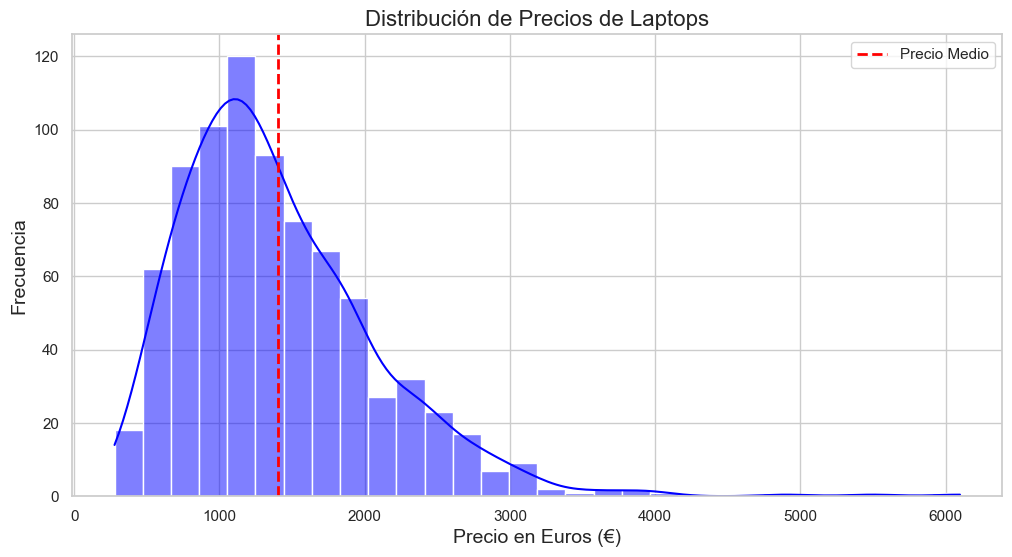

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Configuración de estilo para los gráficos
sns.set(style='whitegrid')

# Gráfico 1: Distribución de precios de laptops
plt.figure(figsize=(12, 6))
sns.histplot(df_SSD['Price_euros'], bins=30, kde=True, color='blue')
plt.title('Distribución de Precios de Laptops', fontsize=16)
plt.xlabel('Precio en Euros (€)', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.axvline(df_SSD['Price_euros'].mean(), color='red', linestyle='dashed', linewidth=2, label='Precio Medio')
plt.legend()
plt.show()

## 2. Gráfico de Barras de Precio Medio por Tipo
**Utilidad:** Este gráfico ayuda a comparar el costo promedio de diferentes tipos de laptops, como Notebooks, Ultrabooks, etc. 
Permite:
- **Decisiones de Compra:** Identificar qué tipo de laptop podría ser más rentable.
- **Estrategia de Producto:** Permite determinar qué tipos de laptops son más caros y, por ende, posiblemente más lucrativos.
- **Tendencias del Mercado:** Observar si ciertos tipos de laptops han aumentado de precio a lo largo del tiempo, lo que puede indicar una mayor demanda.

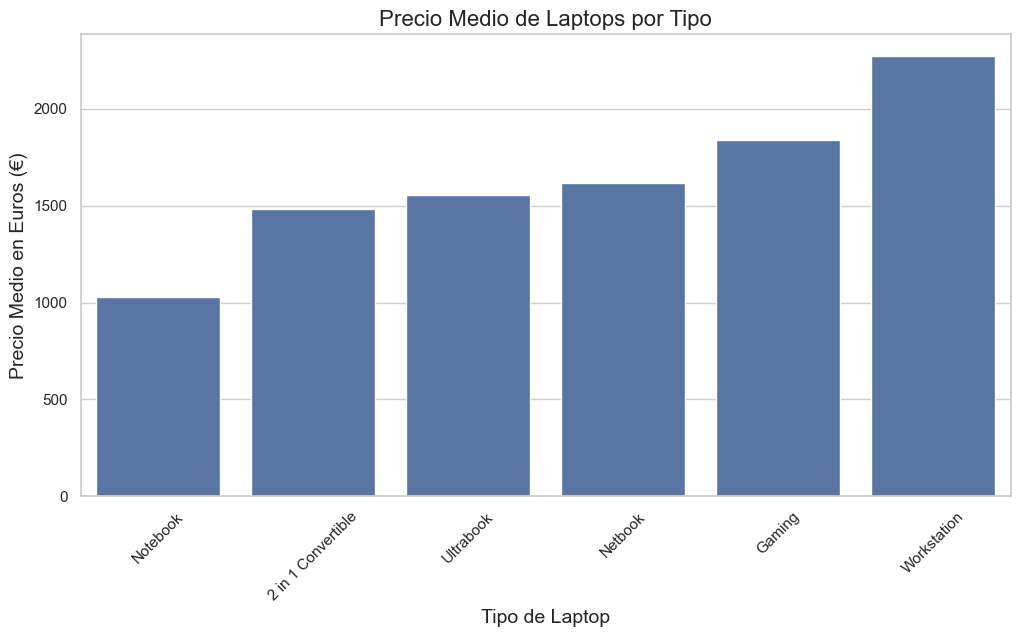

In [73]:
# Gráfico 2: Gráfico de barras mostrando el precio medio por tipo de laptop
plt.figure(figsize=(12, 6))
mean_price_by_type = df_SSD.groupby('TypeName')['Price_euros'].mean().sort_values()
sns.barplot(x=mean_price_by_type.index, y=mean_price_by_type.values)
plt.title('Precio Medio de Laptops por Tipo', fontsize=16)
plt.xlabel('Tipo de Laptop', fontsize=14)
plt.ylabel('Precio Medio en Euros (€)', fontsize=14)
plt.xticks(rotation=45)
plt.show()

## 3. Gráfico de Barras de Cantidad de Laptops por Tipo
**Utilidad:** Este gráfico presenta cuántas laptops hay de cada tipo, ayudando a identificar cuáles son más comunes en el mercado. Permite:
- **Gestión de Inventario:** Ayuda a ajustar el inventario y asegurar que se tenga suficiente variedad en los tipos más demandados.
- **Preferencias del Consumidor:** Proporciona información sobre qué tipos de laptops son más populares, lo cual es esencial para planificar estrategias de marketing.
- **Análisis de Competencia:** Permite comparar la oferta de la empresa con la de competidores, ayudando a identificar áreas de mejora o expansión.

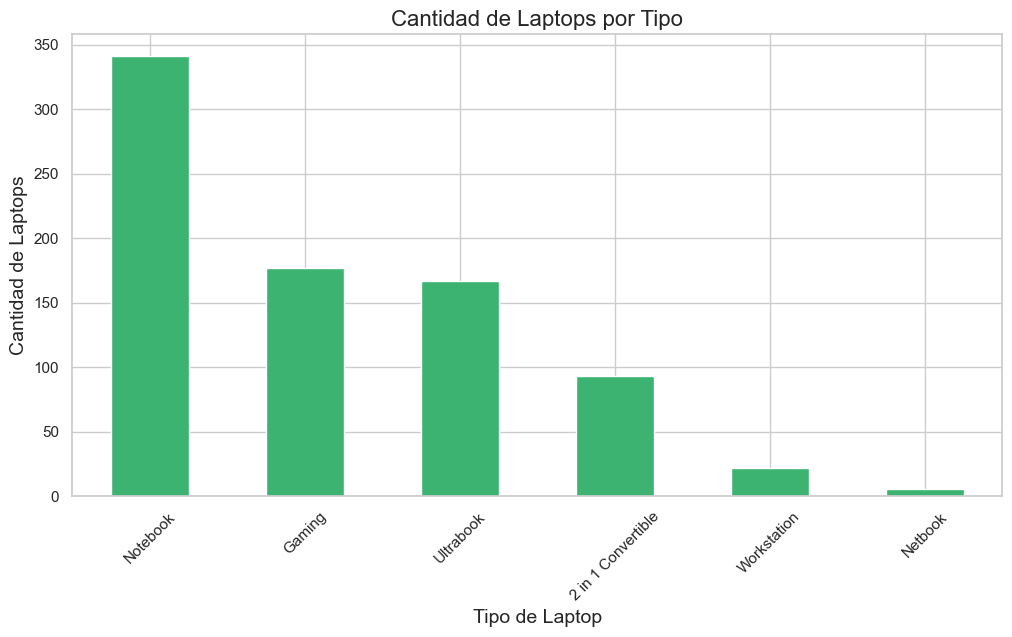

In [74]:
# Gráfico 3: Gráfico de barras mostrando la cantidad de laptops por tipo
plt.figure(figsize=(12, 6))
type_counts = df_SSD['TypeName'].value_counts()
type_counts.plot(kind='bar', color='mediumseagreen')
plt.title('Cantidad de Laptops por Tipo', fontsize=16)
plt.xlabel('Tipo de Laptop', fontsize=14)
plt.ylabel('Cantidad de Laptops', fontsize=14)
plt.xticks(rotation=45)
plt.show()

## 4. Relación entre RAM y Precio
Utilidad: Al analizar la relación entre la cantidad de RAM y el precio de las laptops, podemos observar cómo la memoria influye en el costo. Esto nos permitirá determinar si la RAM es un factor significativo en nuestras predicciones de precio, lo cual es crucial para el ajuste de nuestro modelo.

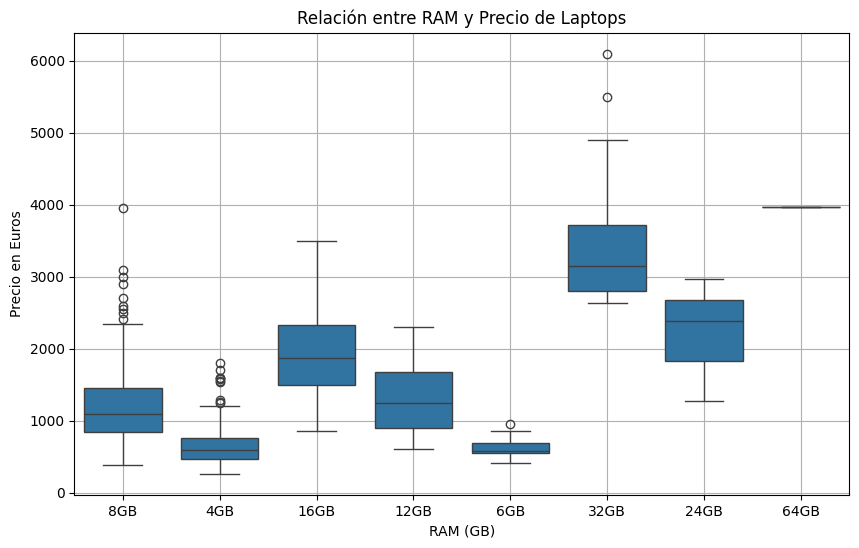

In [5]:
# Gráfico 4 de caja: Relación entre RAM y Precio de Laptops
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ram', y='Price_euros', data=df_SSD)
plt.title('Relación entre RAM y Precio de Laptops')
plt.xlabel('RAM (GB)')
plt.ylabel('Precio en Euros')
plt.grid()
plt.show()

## 5. Gráfico de Barras de Precio Promedio por Marca
Utilidad: El gráfico de barras que muestra el precio promedio de las laptops por marca nos permite obtener insights valiosos para nuestro objetivo de desarrollar un modelo predictivo de precios.

C:\Users\User\AppData\Local\Temp\ipykernel_4652\1962777635.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_price_by_brand, x='Company', y='Price_euros', palette='viridis')


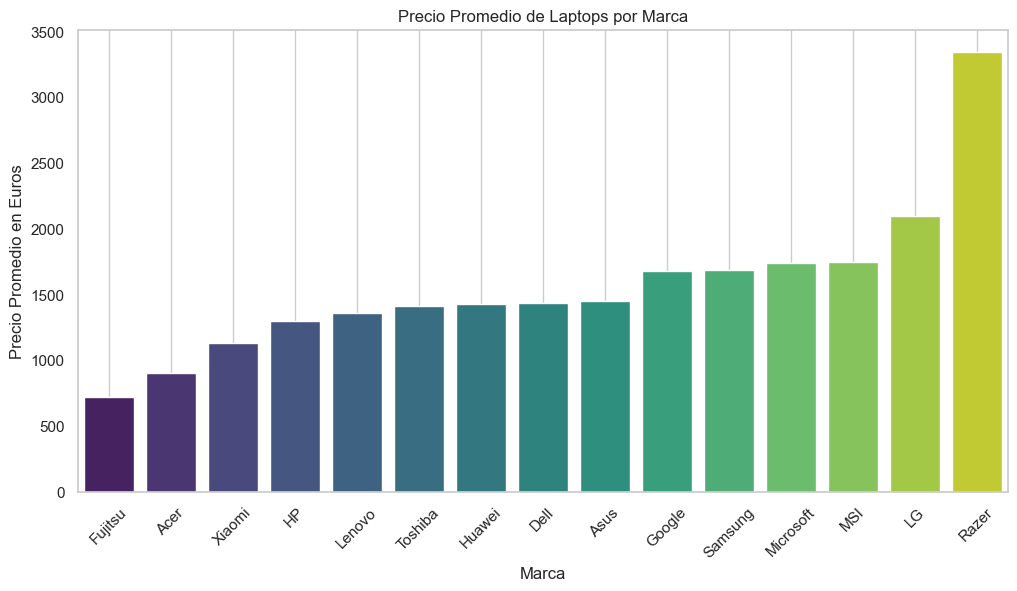

In [78]:
# Gráfico 5 de barras del precio promedio por marca sin el FutureWarning
plt.figure(figsize=(12, 6))
average_price_by_brand = df_SSD.groupby('Company')['Price_euros'].mean().sort_values().reset_index()

# Crear el gráfico de barras sin el parámetro hue
sns.barplot(data=average_price_by_brand, x='Company', y='Price_euros', palette='viridis')
plt.title('Precio Promedio de Laptops por Marca')
plt.xlabel('Marca')
plt.ylabel('Precio Promedio en Euros')
plt.xticks(rotation=45)
plt.grid()
plt.show()